In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
customers = pd.read_csv('/kaggle/input/zeotap-1/Customers.csv')
products = pd.read_csv('/kaggle/input/zeotap-1/Products.csv')
transactions = pd.read_csv('/kaggle/input/zeotap-1/Transactions.csv')

In [22]:
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [23]:
customers.describe(include='object')

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


### 1. Rise in Popularity over the years

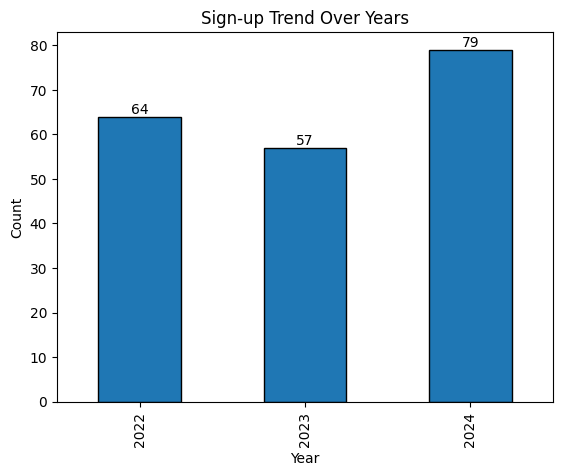

In [24]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Count sign-ups per year
yearly_signups = customers['SignupDate'].dt.year.value_counts().sort_index()

ax = yearly_signups.plot(kind='bar', edgecolor='black')

plt.title('Sign-up Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Count')

# Annotate the value on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()


Number of transactions per year

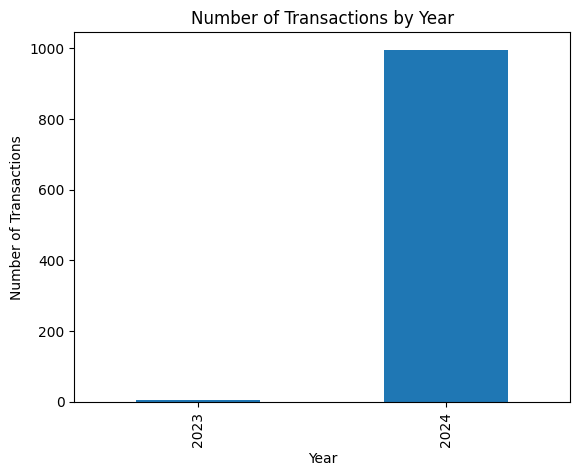

In [25]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

transactions['Year'] = transactions['TransactionDate'].dt.year
transactions_per_year = transactions['Year'].value_counts().sort_index()

transactions_per_year.plot(kind='bar', title='Number of Transactions by Year', xlabel='Year', ylabel='Number of Transactions')
plt.show()

### 2. Product Category performance for each region

In [26]:
# Merge transactions, customers, and products to get product category and region
category_sales_by_region = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID') \
                                       .merge(products[['ProductID', 'Category']], on='ProductID')

# Calculate total sales per category and region (Quantity * Price)
category_sales_by_region['TotalSales'] = category_sales_by_region['Quantity'] * category_sales_by_region['Price']

# Group by Region and Category, then sum the TotalSales
category_sales_by_region = category_sales_by_region.groupby(['Region', 'Category'])['TotalSales'].sum().unstack().fillna(0)

# Display the values without plotting
print(category_sales_by_region)


Category          Books  Clothing  Electronics  Home Decor
Region                                                    
Asia           33119.03  49353.09     35658.15    33944.70
Europe         47464.42  36335.59     41562.60    40892.02
North America  41811.99  38038.49     44716.43    27746.49
South America  69752.03  42443.49     58846.32    48310.72


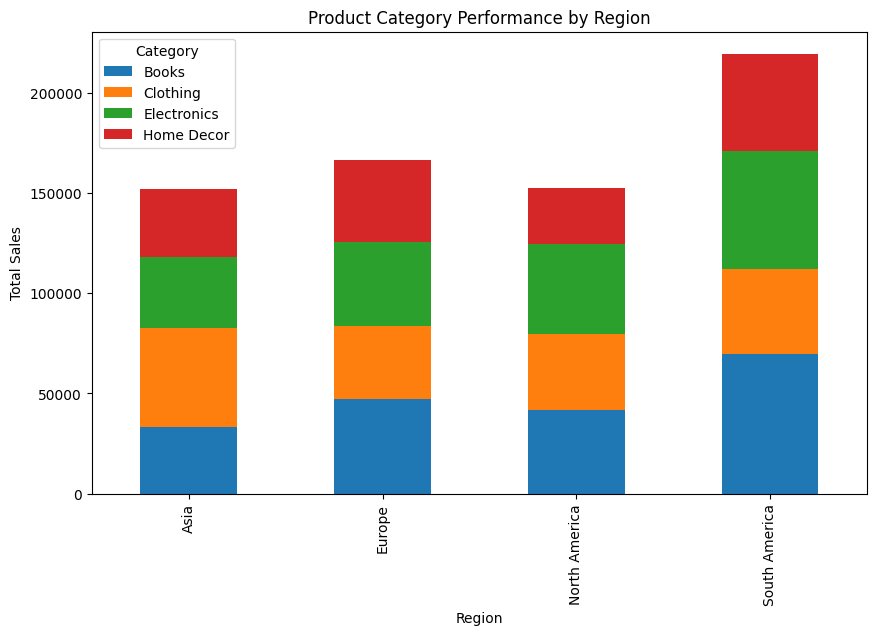

In [27]:
# We Merge transactions, customers, and products to get product category and region
category_sales_by_region = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID') \
                                       .merge(products[['ProductID', 'Category']], on='ProductID')

# We Calculate total sales per category and region (Quantity * Price)
category_sales_by_region['TotalSales'] = category_sales_by_region['Quantity'] * category_sales_by_region['Price']
category_sales_by_region = category_sales_by_region.groupby(['Region', 'Category'])['TotalSales'].sum().unstack().fillna(0)

category_sales_by_region.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Product Category Performance by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


### 3. How Product prices affect total value spent with respect to customers of each Region (Analyse cost sensitivity)

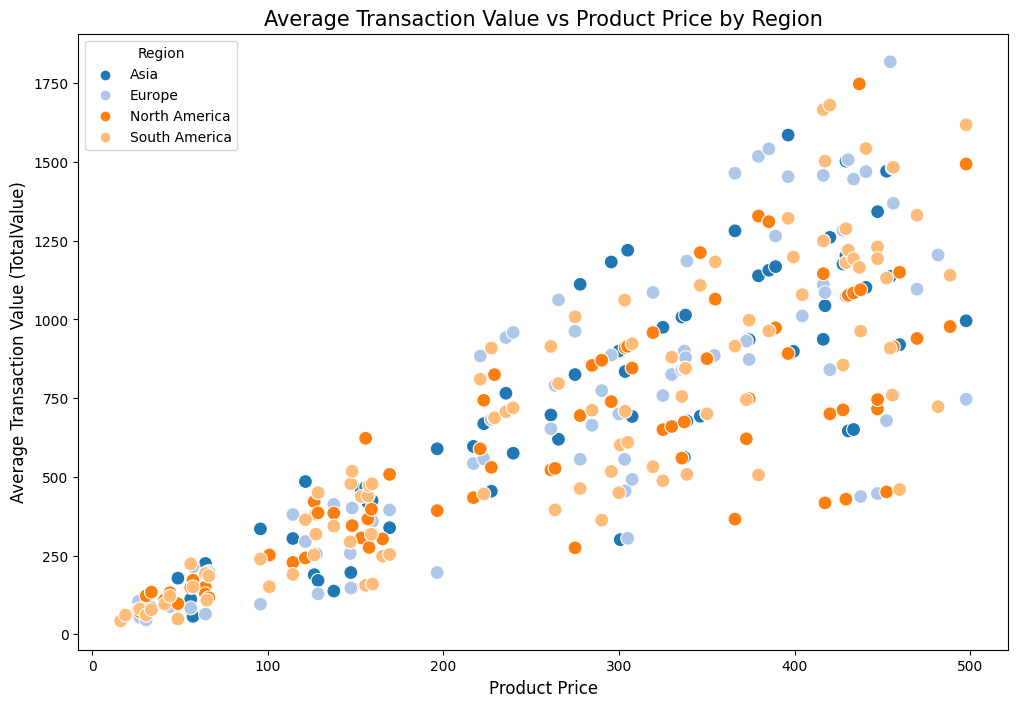

In [29]:
merged_data = pd.merge(transactions, customers, on='CustomerID')

region_price_spending = merged_data.groupby(['Region', 'Price'])['TotalValue'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=region_price_spending, x='Price', y='TotalValue', hue='Region', palette='tab20', s=100, edgecolor='w')

plt.title('Average Transaction Value vs Product Price by Region', fontsize=15)
plt.xlabel('Product Price', fontsize=12)
plt.ylabel('Average Transaction Value (TotalValue)', fontsize=12)
plt.legend(title='Region')

plt.show()

In [30]:
# Computing the correlation of Price and TotalValue for each region to determine a relation between them
region_correlation = region_price_spending.groupby('Region')[['Price', 'TotalValue']].apply(lambda x: x['Price'].corr(x['TotalValue']))

print(region_correlation)

Region
Asia             0.878365
Europe           0.826950
North America    0.828016
South America    0.860047
dtype: float64


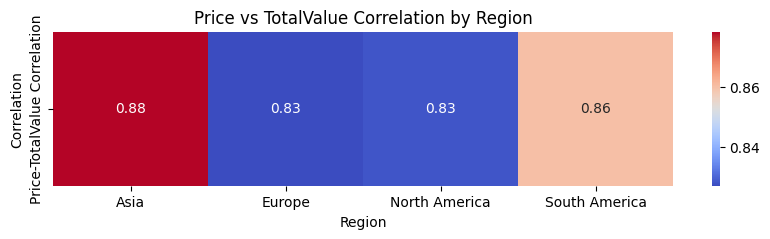

In [31]:
region_correlation = region_price_spending.groupby('Region')[['Price', 'TotalValue']].apply(
    lambda x: x['Price'].corr(x['TotalValue'])
)

correlation_matrix = region_correlation.values.reshape(1, -1)

plt.figure(figsize=(10, 2))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    xticklabels=region_correlation.index, 
    yticklabels=['Price-TotalValue Correlation']
)

plt.title('Price vs TotalValue Correlation by Region')
plt.xlabel('Region')
plt.ylabel('Correlation')

plt.show()

### 4. Spending per region insight

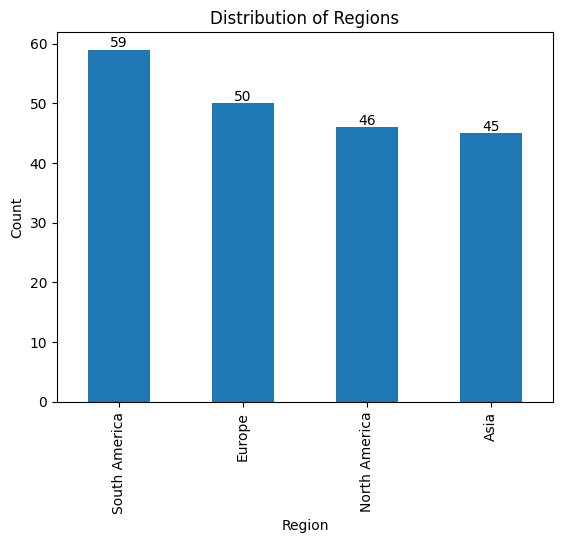

In [34]:
import matplotlib.pyplot as plt

ax = customers['Region'].value_counts().plot(kind='bar')

plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()


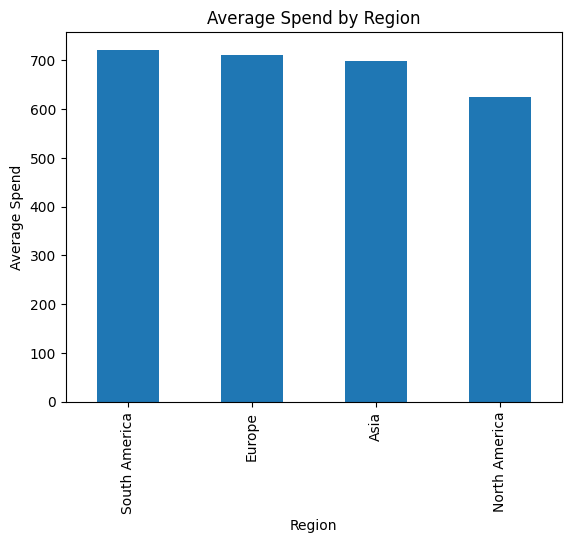

In [39]:
# Merge the customers and transactions datasets to get region and total value of transactions
region_spend = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID')
avg_spend_by_region = region_spend.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)

avg_spend_by_region.plot(kind='bar', title='Average Spend by Region', xlabel='Region', ylabel='Average Spend')
plt.show()


In [46]:
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spending = customer_spending.merge(customers[['CustomerID', 'CustomerName']], on='CustomerID')

# Segment customers into low, medium, and high spenders
bins = [0, customer_spending['TotalValue'].quantile(0.33), customer_spending['TotalValue'].quantile(0.66), customer_spending['TotalValue'].max()]
labels = ['Low', 'Medium', 'High']
customer_spending['SpendingSegment'] = pd.cut(customer_spending['TotalValue'], bins=bins, labels=labels)

customer_spending = customer_spending.merge(customers[['CustomerID', 'Region']], on='CustomerID')

# Count the number of customers in each spending segment per region
spending_segment_region_counts = customer_spending.groupby(['Region', 'SpendingSegment'],observed=False).size().unstack(fill_value=0)

# Display the results
print(spending_segment_region_counts)

SpendingSegment  Low  Medium  High
Region                            
Asia              15      12    17
Europe            21      12    17
North America     14      22    10
South America     16      19    24


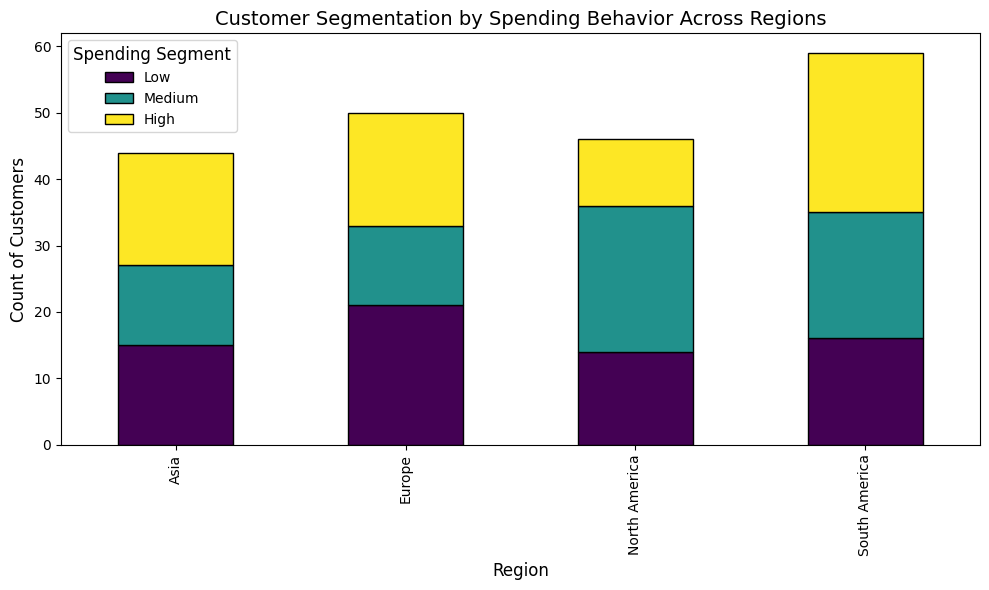

In [48]:
import matplotlib.pyplot as plt

spending_segment_region_counts.plot(kind='bar', stacked=True, figsize=(10, 6), edgecolor='black', colormap='viridis')

plt.title('Customer Segmentation by Spending Behavior Across Regions', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count of Customers', fontsize=12)


plt.legend(title='Spending Segment', title_fontsize=12)
plt.tight_layout()
plt.show()


### 5. Business Insights from variation of sales of products of different category throughout 2024

In [49]:
# Filter transactions for the year 2024
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions_2024 = transactions[transactions['TransactionDate'].dt.year == 2024]

# Merge with products to include Category
merged_data = transactions_2024.merge(products, on='ProductID')

# Extracting month from TransactionDate
merged_data['Month'] = merged_data['TransactionDate'].dt.month

# Group by Month and Category to calculate total quantity and total spending
monthly_category_summary = merged_data.groupby(['Month', 'Category']).agg(
    TotalQuantity=('Quantity', 'sum'),
    TotalSpending=('TotalValue', 'sum')
).reset_index()

print(monthly_category_summary)


    Month     Category  TotalQuantity  TotalSpending
0       1        Books             76       17515.05
1       1     Clothing             54       17984.46
2       1  Electronics             65       16786.31
3       1   Home Decor             57       14090.57
4       2        Books             65       21073.17
5       2     Clothing             34        8091.81
6       2  Electronics             32        8556.44
7       2   Home Decor             61       13737.85
8       3        Books             45        9091.55
9       3     Clothing             33        7520.12
10      3  Electronics             68       15383.29
11      3   Home Decor             70       15833.77
12      4        Books             42       11270.08
13      4     Clothing             53       14454.24
14      4  Electronics             53       18390.58
15      4   Home Decor             55       13404.16
16      5        Books             72       21793.32
17      5     Clothing             53       17

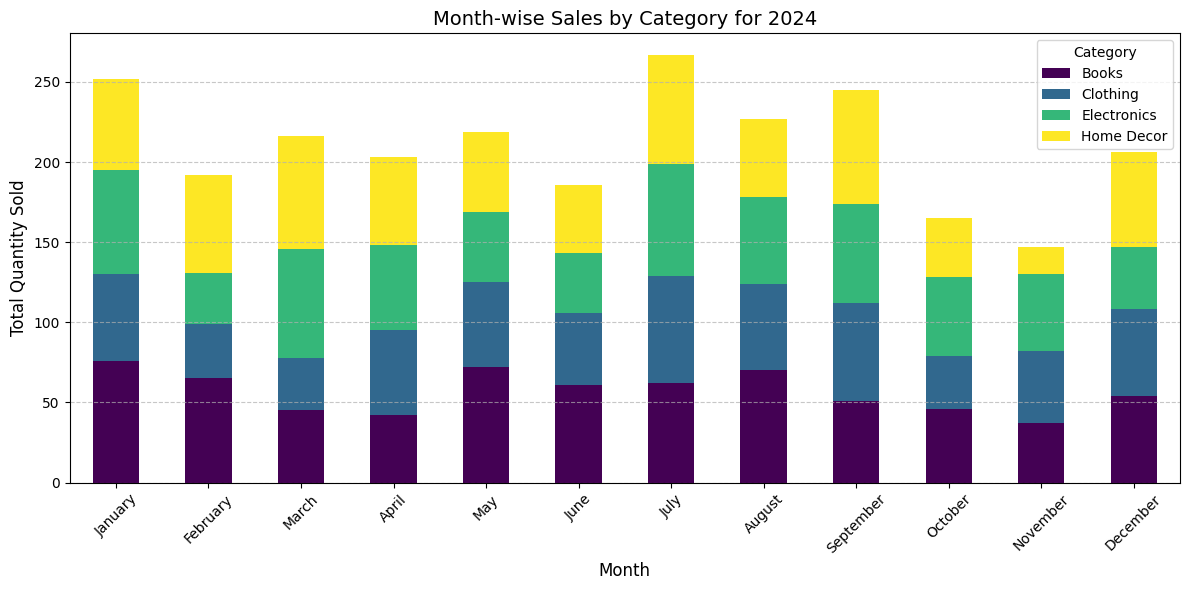

In [50]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions_2024 = transactions[transactions['TransactionDate'].dt.year == 2024]

merged_data = transactions_2024.merge(products, on='ProductID')

merged_data['Month'] = merged_data['TransactionDate'].dt.month

# Grouping by Month and Category to calculate total sales
monthly_category_sales = merged_data.groupby(['Month', 'Category'])['Quantity'].sum().unstack(fill_value=0)

monthly_category_sales.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title('Month-wise Sales by Category for 2024', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(ticks=range(12), labels=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], rotation=45)
plt.legend(title='Category', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
